# User reliability
Here two approaches are explained to review the reliability of user labelling. The first is based on additional provided relevanceCharacterRanges and the second one is based on majority voting and possible contradiction of user labels.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Read baseline qrels file
baseline_qrels_df = pd.read_csv("Part-1/fira-22.baseline-qrels.tsv", sep="\t", encoding='latin-1')
# Read documents file
documents_df = pd.read_csv("Part-1/fira-22.documents.tsv", sep="\t", encoding='latin-1')
# Read judgements file
judgements_df = pd.read_csv("Part-1/fira-22.judgements-anonymized.tsv", sep="\t",encoding='latin-1')
# Read queries file
queries_df = pd.read_csv("Part-1/fira-22.queries.tsv", sep="\t",encoding='latin-1')

In [32]:
#queries_df
judgements_df #4175 for queryID
#documents_df
#baseline_qrels_df

,id,relevanceLevel,relevanceCharacterRanges,durationUsedToJudgeMs,judgedAtUnixTS,documentId,queryId,userId
0,1,2_GOOD_ANSWER,<no ranges selected>,15712,1648481149,rob_FBIS3-10909,rob_q_FBIS3-10909,User_0
1,2,0_NOT_RELEVANT,<no ranges selected>,160000,1648481336,rob_FBIS3-10383,rob_q_FT941-8917,User_0
2,3,1_TOPIC_RELEVANT_DOES_NOT_ANSWER,<no ranges selected>,16699,1648481352,rob_FBIS3-10722,rob_q_FBIS3-32394,User_0
3,4,2_GOOD_ANSWER,<no ranges selected>,3442,1648481339,rob_FBIS3-11360,rob_q_FBIS3-11360,User_1
4,5,2_GOOD_ANSWER,<no ranges selected>,15849,1648481354,rob_FBIS3-11056,rob_q_FBIS3-11617,User_1
...,...,...,...,...,...,...,...,...
67219,67676,3_PERFECT_ANSWER,133-399;1863-2100,54516,1649724672,trip_1766631,trip_228289,User_49
67220,67677,3_PERFECT_ANSWER,116-272;1694-1846,35868,1649724708,trip_1768761,trip_22420,User_49
67221,67678,3_PERFECT_ANSWER,123-278;1809-2013,58469,1649724767,trip_1771729,trip_27540,User_49
67222,67679,3_PERFECT_ANSWER,110-401,65513,1649724832,trip_1772193,trip_31051,User_49


## Data exploration:
* What is the distribution of number of judgements per pair?
* What is the distribution of number of documents per query?
* What is the proportion of relevance categories for relevant and non-relevant pairs with respect to baseline?

In [33]:
print("Number of judgements: ", judgements_df.shape[0])
print("Number of unique queries: ", judgements_df['queryId'].nunique())
print("Number of unique documents: ", judgements_df['documentId'].nunique())
print("Number of query-document pairs: ", judgements_df.groupby(by = ['queryId', 'documentId']).count()['id'].count())
print("Number of users: ", judgements_df['userId'].nunique())

Number of judgements:  67224
Number of unique queries:  4175
Number of unique documents:  21190
Number of query-document pairs:  24189
Number of users:  152


In [34]:
judgements_df[judgements_df['queryId'] == 'trip_228289']

,id,relevanceLevel,relevanceCharacterRanges,durationUsedToJudgeMs,judgedAtUnixTS,documentId,queryId,userId
29096,29157,2_GOOD_ANSWER,<no ranges selected>,66307,1649149463,trip_9231393,trip_228289,User_33
29460,29521,3_PERFECT_ANSWER,<no ranges selected>,28516,1649145769,trip_9360939,trip_228289,User_0
32316,32389,1_TOPIC_RELEVANT_DOES_NOT_ANSWER,<no ranges selected>,16170,1649207449,trip_9231393,trip_228289,User_99
32670,32746,2_GOOD_ANSWER,176-376;951-1102;1880-2052,111843,1649230314,trip_9360939,trip_228289,User_28
35482,35604,1_TOPIC_RELEVANT_DOES_NOT_ANSWER,<no ranges selected>,160000,1649274888,trip_9231393,trip_228289,User_74
35846,35968,1_TOPIC_RELEVANT_DOES_NOT_ANSWER,<no ranges selected>,160000,1649277628,trip_9360939,trip_228289,User_122
37857,37990,3_PERFECT_ANSWER,0-102,65078,1649341631,trip_5611076,trip_228289,User_30
38278,38411,1_TOPIC_RELEVANT_DOES_NOT_ANSWER,<no ranges selected>,160000,1649348463,trip_7772475,trip_228289,User_53
38687,38823,2_GOOD_ANSWER,<no ranges selected>,21297,1649348521,trip_9201713,trip_228289,User_0
40953,41096,3_PERFECT_ANSWER,0-50;217-307;310-386;1053-1111;1395-1544;1994-...,160000,1649411833,trip_5611076,trip_228289,User_131


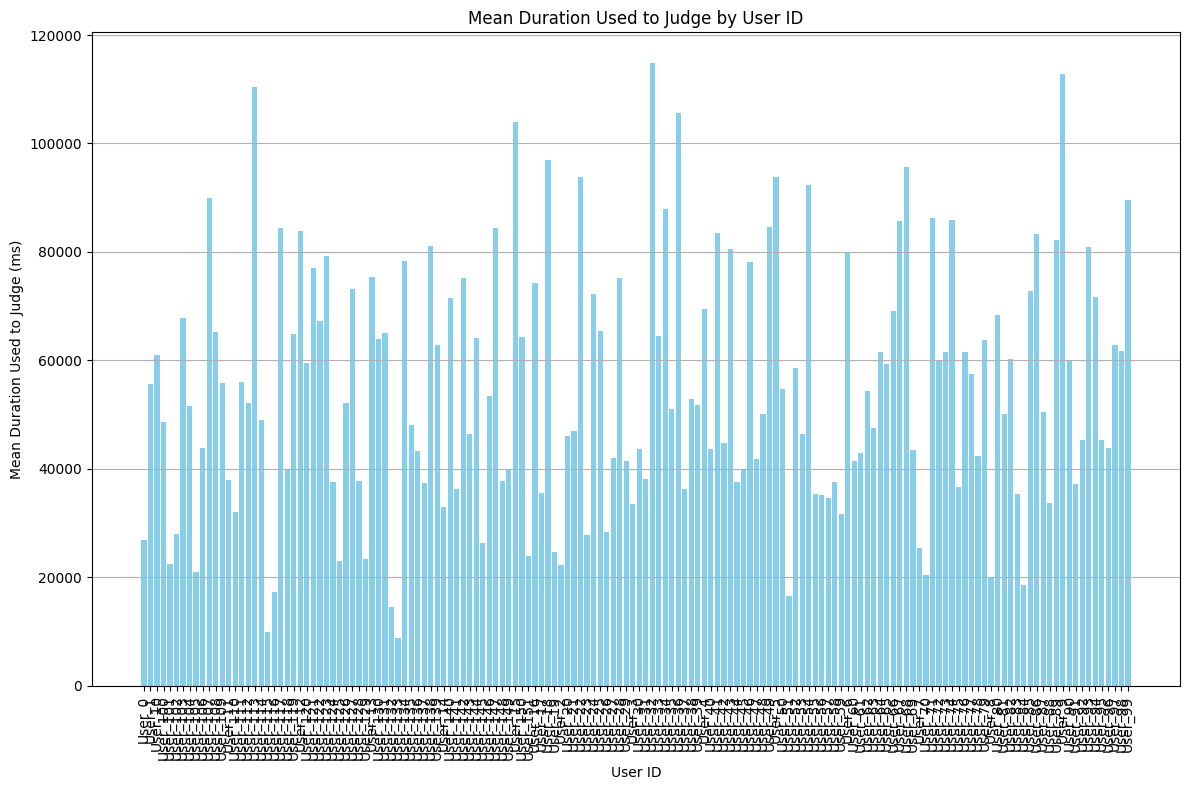

In [35]:
mean_duration_by_user = judgements_df.groupby('userId')['durationUsedToJudgeMs'].mean().reset_index()
# Rename the column to be more descriptive
mean_duration_by_user.columns = ['userId', 'meanDurationUsedToJudgeMs']

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(mean_duration_by_user['userId'], mean_duration_by_user['meanDurationUsedToJudgeMs'], color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Mean Duration Used to Judge (ms)')
plt.title('Mean Duration Used to Judge by User ID')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.grid(axis='y')

plt.show()

Mean duration does not say much

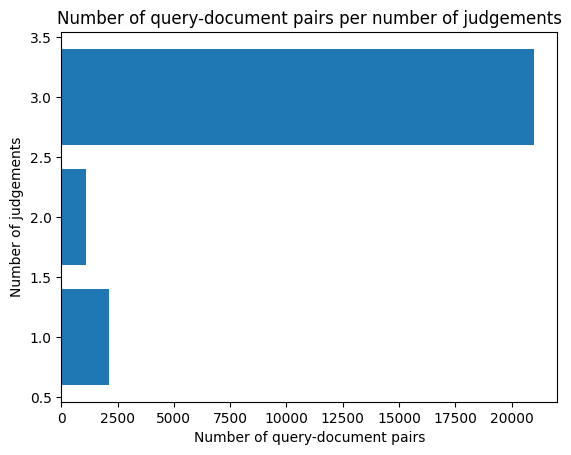

In [36]:
# number of query-document pairs per number of judgements
counts = judgements_df.groupby(by = ['queryId', 'documentId']).count()['id'].reset_index().groupby(by = ['id']).count()['queryId'].reset_index()
plt.barh(counts['id'], counts['queryId'])
plt.title('Number of query-document pairs per number of judgements')
plt.xlabel('Number of query-document pairs')
plt.ylabel('Number of judgements')
plt.show()


Usually three users provided a label for specific query-document pair.

## Reliability based on additional relevanceCharacterRanges
The assumption to be investigated here, is that users that provide also relevanceCharacterRanges are more reliable in their answers and therefore, they should receive higher weight. For this analysis we use only samples which received at least one relevanceCharacterRanges by any user.

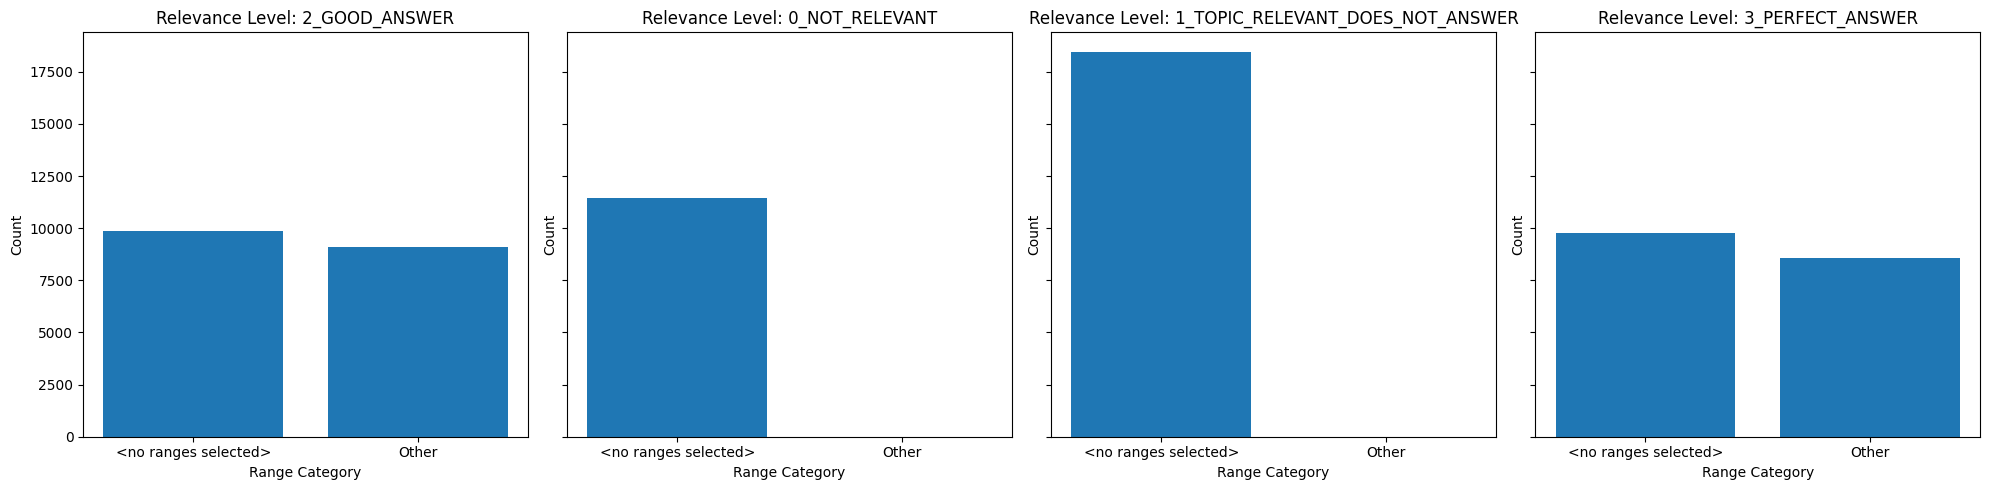

In [37]:
# Categorize the relevanceCharacterRanges
judgements_df['Range Category'] = judgements_df['relevanceCharacterRanges'].apply(
    lambda x: '<no ranges selected>' if x == '<no ranges selected>' else 'Other')

# Unique relevance levels in the data
relevance_levels = judgements_df['relevanceLevel'].unique()

# Create a figure and axes
fig, axs = plt.subplots(1, len(relevance_levels), figsize=(20, 5), sharey=True)

# Check if there's only one relevance level (in which case axs is not an array)
if len(relevance_levels) == 1:
    axs = [axs]

# Plot a histogram for each relevance level
for ax, level in zip(axs, relevance_levels):
    # Filter data for the current relevance level
    data = judgements_df[judgements_df['relevanceLevel'] == level]
    
    # Count the occurrences of each category
    counts = data['Range Category'].value_counts()
    
    # Plot
    ax.bar(counts.index, counts.values)
    ax.set_title(f'Relevance Level: {level}')
    ax.set_xlabel('Range Category')
    ax.set_ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Only for '2_GOOD_ANSWER', '3_PERFECT_ANSWER' a relevanceCharacterRanges is given. Focus only on these.

Text(0, 0.5, 'Document count')

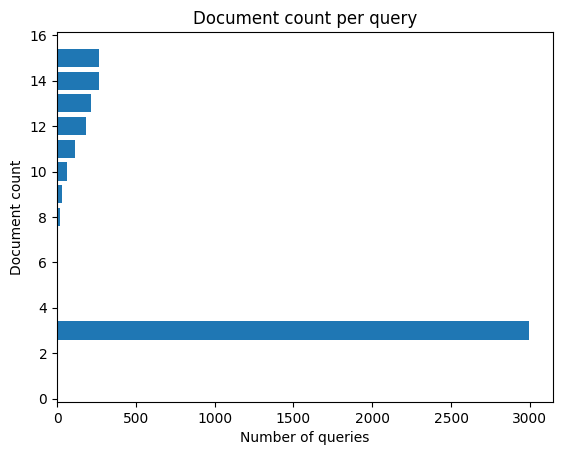

In [38]:
# documents per query
counts = judgements_df.groupby(by = ['queryId', 'documentId']).count()['id'].reset_index().groupby(by = ['queryId']).count()['documentId'].reset_index().groupby(by = ['documentId']).count()['queryId'].reset_index()
plt.barh(counts['documentId'], counts['queryId'])
plt.title('Document count per query')
plt.xlabel('Number of queries')
plt.ylabel('Document count')

C:\Users\a96b3nc\AppData\Local\Temp\ipykernel_24680\1380493868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Range Category'] = filtered_df['relevanceCharacterRanges'].apply(


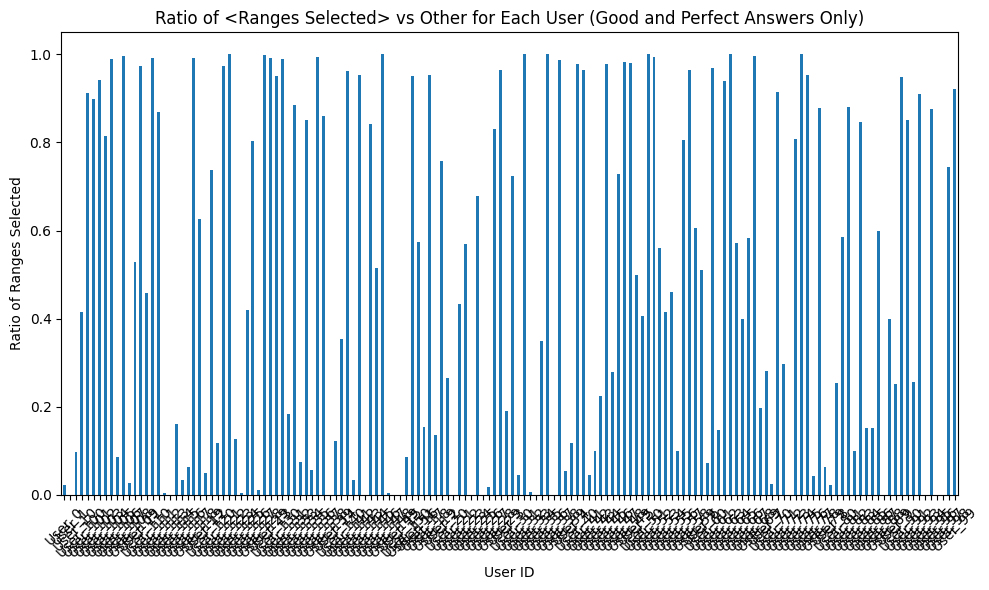

In [39]:
# Filter the DataFrame for desired relevance levels
filtered_df = judgements_df[judgements_df['relevanceLevel'].isin(['2_GOOD_ANSWER', '3_PERFECT_ANSWER'])]

# Categorize the relevanceCharacterRanges
filtered_df['Range Category'] = filtered_df['relevanceCharacterRanges'].apply(
    lambda x: 'No Ranges Selected' if x == '<no ranges selected>' else 'Ranges Selected')

# Group by userId and Range Category and count occurrences
grouped = filtered_df.groupby(['userId', 'Range Category']).size().unstack(fill_value=0)

# Calculate the ratio of 'Ranges Selected' to '!= <no ranges selected>'
grouped['Ratio'] = grouped['Ranges Selected'] / (grouped['Ranges Selected'] + grouped['No Ranges Selected'])

# Sort the users by their ID for a consistent plotting order
grouped = grouped.sort_index()

# Create a bar plot of the ratio for each user
plt.figure(figsize=(10, 6))
grouped['Ratio'].plot(kind='bar')
plt.title('Ratio of <Ranges Selected> vs Other for Each User (Good and Perfect Answers Only)')
plt.xlabel('User ID')
plt.ylabel('Ratio of Ranges Selected')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In the above plot all queries are included, but some queries never get a relevanceCharacterRanges assign (maybe it is not possible). Therefore, I filter out all queryIds which always have 'no ranges selected'.

In [40]:
unique_queries = filtered_df.queryId.unique().tolist()
print(len(unique_queries))
unique_users = filtered_df.userId.unique().tolist()
print(len(unique_users))

3996
152


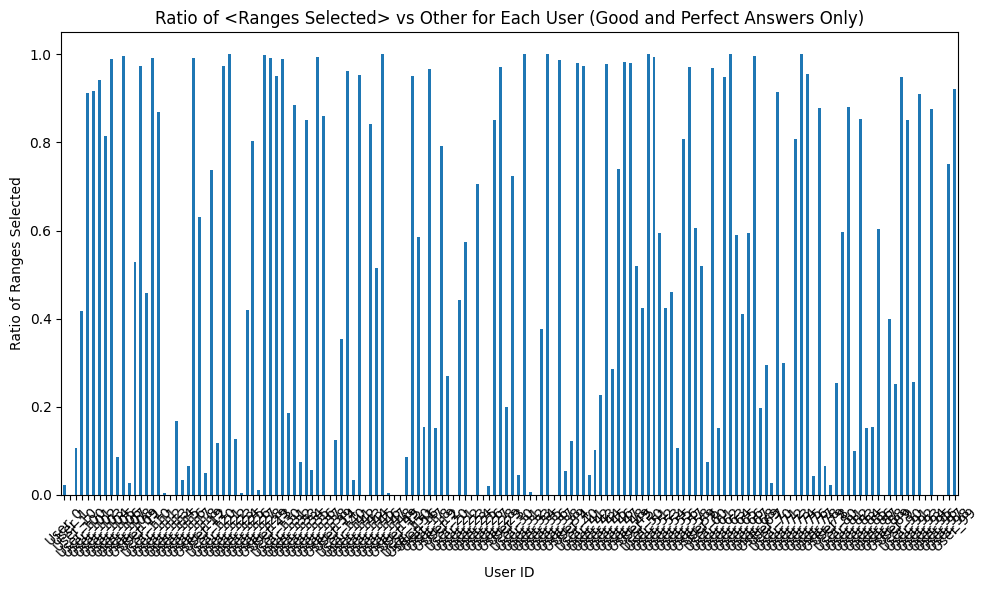

In [41]:
all_no_ranges = judgements_df.groupby('queryId')['relevanceCharacterRanges'].apply(lambda x: (x == '<no ranges selected>').all())
# Filter out the queryIds where all relevanceCharacterRanges are '<no ranges selected>'
filtered_query_ids = all_no_ranges[~all_no_ranges].index
# Use this index to filter the original DataFrame
filtered_df = judgements_df[judgements_df['queryId'].isin(filtered_query_ids)]
# Filter the DataFrame for desired relevance levels
filtered_df = filtered_df[filtered_df['relevanceLevel'].isin(['2_GOOD_ANSWER', '3_PERFECT_ANSWER'])]

# Categorize the relevanceCharacterRanges
filtered_df['Range Category'] = filtered_df['relevanceCharacterRanges'].apply(
    lambda x: 'No Ranges Selected' if x == '<no ranges selected>' else 'Ranges Selected')

# Group by userId and Range Category and count occurrences
grouped = filtered_df.groupby(['userId', 'Range Category']).size().unstack(fill_value=0)

# Calculate the ratio of 'ranges selected' to '!= <no ranges selected>'
grouped['Ratio'] = grouped['Ranges Selected'] / (grouped['Ranges Selected'] + grouped['No Ranges Selected'])

# Sort the users by their ID for a consistent plotting order
grouped = grouped.sort_index()

# Create a bar plot of the ratio for each user
plt.figure(figsize=(10, 6))
grouped['Ratio'].plot(kind='bar')
plt.title('Ratio of <Ranges Selected> vs Other for Each User (Good and Perfect Answers Only)')
plt.xlabel('User ID')
plt.ylabel('Ratio of Ranges Selected')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

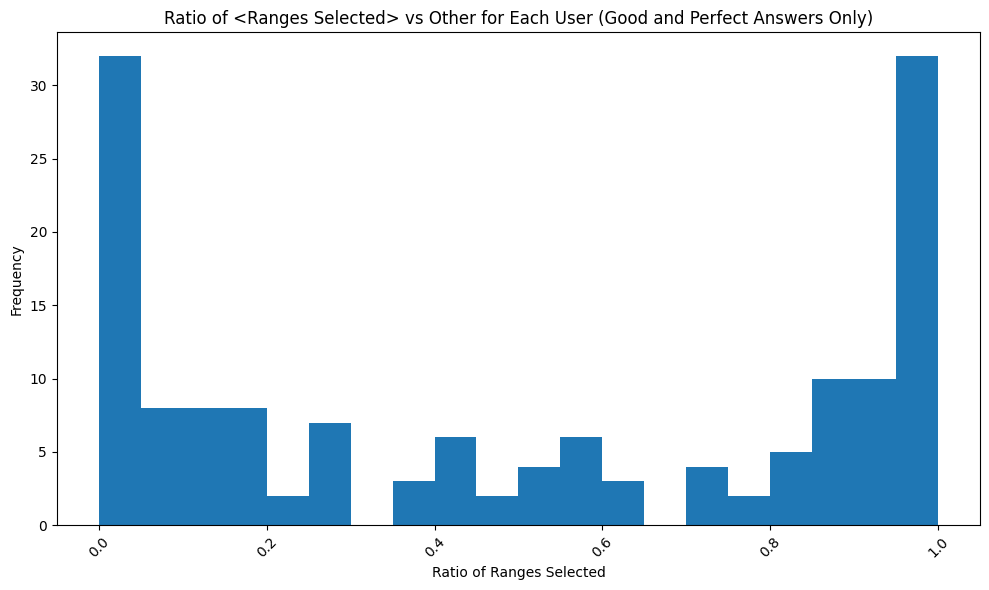

In [42]:
# Create a histogram plot of the ratio for each user
plt.figure(figsize=(10, 6))
grouped['Ratio'].plot(kind='hist', bins=20)
plt.title('Ratio of <Ranges Selected> vs Other for Each User (Good and Perfect Answers Only)')
plt.xlabel('Ratio of Ranges Selected')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
grouped_data = judgements_df.groupby(['userId', 'relevanceLevel']).size().unstack(fill_value=0)

# Calculate the number of rows needed for subplots (each row has two plots)
num_users = len(grouped_data)
num_rows = (num_users + 1) // 2  # This handles odd and even numbers of users

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(20, 6 * num_rows))  # Adjust the size as needed

# Flatten the axis array for easier indexing
axs = axs.ravel()

# Loop through the grouped data to plot each user's data
for i, (user_id, user_data) in enumerate(grouped_data.iterrows()):
    user_data.plot(kind='bar', ax=axs[i], title=f'User ID: {user_id}')
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel('Relevance Level')
    axs[i].set_xticklabels(user_data.index, rotation=45)

# If there is an odd number of users, hide the last subplot if it's unused
if num_users % 2 != 0:
    axs[-1].axis('off')  # Hide last subplot if there's an odd number of users

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


In [44]:
unique_queries = filtered_df.queryId.unique().tolist()
print(len(unique_queries))
unique_users = filtered_df.userId.unique().tolist()
print(len(unique_users))

3751
152


## Reliability based on majority voting and contradictory labels

In the following a simplified relevance is defined as given by mapping_relevance.

In [45]:
mapping_relevance = {
    '0_NOT_RELEVANT': 0,
    '1_TOPIC_RELEVANT_DOES_NOT_ANSWER': 0,
    '2_GOOD_ANSWER': 1,
    '3_PERFECT_ANSWER': 1
}

def is_contradictory(judgements, mapping_relevance):
    judgements_binary = list(judgements['relevanceLevel'].map(mapping_relevance))
    return int(0 in judgements_binary and 1 in judgements_binary)

flag_is_contradictory = judgements_df.groupby(by = ['queryId', 'documentId']).apply(lambda x: is_contradictory(x, mapping_relevance)).reset_index()
flag_is_contradictory.columns = ['queryId', 'documentId', 'contradictory']

In [46]:
def get_binary_relevance(judgements, mapping_relevance):
    return judgements['relevanceLevel'].map(mapping_relevance).value_counts().idxmax()

flag_binary_relevance = judgements_df.groupby(by = ['queryId', 'documentId']).apply(lambda x: get_binary_relevance(x, mapping_relevance)).reset_index()
flag_binary_relevance.columns = ['queryId', 'documentId', 'relevant']

In [47]:
def has_majority(judgements, mapping_relevance):
    judgements_binary = judgements['relevanceLevel'].map(mapping_relevance)
    if len(judgements_binary) == 1:
        return 1
    elif len(judgements_binary) == 2:
        # check if both judgements are the same
        return int(judgements_binary.nunique() == 1)
    else:
        # check if the majority is at least 2
        return int(judgements_binary.value_counts().max() >= 2)

flag_has_majority = judgements_df.groupby(by = ['queryId', 'documentId']).apply(lambda x: has_majority(x, mapping_relevance)).reset_index()
flag_has_majority.columns = ['queryId', 'documentId', 'has_majority']

In [48]:
weights_relevance = {
    '0_NOT_RELEVANT': 1,
    '1_TOPIC_RELEVANT_DOES_NOT_ANSWER': 10,
    '2_GOOD_ANSWER': 100,
    '3_PERFECT_ANSWER': 1000
}

def normalized_weighted_relevance_score(judgements, weights_relevance):
    judgements['relevanceScore'] = judgements['relevanceLevel'].map(weights_relevance)
    return np.log((np.prod(judgements['relevanceScore']) + 1) / len(judgements))

score_relevance = judgements_df.groupby(by = ['queryId', 'documentId']).apply(lambda x: normalized_weighted_relevance_score(x, weights_relevance)).reset_index() 
score_relevance.columns = ['queryId', 'documentId', 'relevanceScore']

In [49]:
df_pairs = judgements_df.groupby(by = ['queryId', 'documentId']).count()['id'].reset_index()
df_pairs.columns = ['queryId', 'documentId', 'count']
df_pairs = df_pairs.merge(flag_is_contradictory, on=['queryId', 'documentId'])
df_pairs = df_pairs.merge(flag_binary_relevance, on=['queryId', 'documentId'])
df_pairs = df_pairs.merge(score_relevance, on=['queryId', 'documentId'])
df_pairs = df_pairs.merge(flag_has_majority, on=['queryId', 'documentId'])
df_pairs['contradictory_text'] = df_pairs['contradictory'].map({0: 'non-contradictory', 1: 'contradictory'})
df_pairs['relevant_text'] = df_pairs['relevant'].map({0: 'non-relevant', 1: 'relevant'})
df_pairs['relevanceScore_minmax'] = (df_pairs['relevanceScore'] - df_pairs['relevanceScore'].min()) / (df_pairs['relevanceScore'].max() - df_pairs['relevanceScore'].min())
df_pairs['has_majority_text'] = df_pairs['has_majority'].map({0: 'no majority', 1: 'has majority'})
df_pairs

,queryId,documentId,count,contradictory,relevant,relevanceScore,has_majority,contradictory_text,relevant_text,relevanceScore_minmax,has_majority_text
0,db_q_<dbpedia:...That's_the_Way_It_Is>,db_<dbpedia:...That's_the_Way_It_Is>,3,0,1,17.322068,1,non-contradictory,relevant,0.885044,has majority
1,db_q_<dbpedia:...That's_the_Way_It_Is>,db_<dbpedia:For_the_Love_of_Harry:_Everybody_S...,3,0,0,3.516508,1,non-contradictory,non-relevant,0.195804,has majority
2,db_q_<dbpedia:...That's_the_Way_It_Is>,db_<dbpedia:Old_Dirt_Road>,3,0,0,1.299283,1,non-contradictory,non-relevant,0.085109,has majority
3,db_q_<dbpedia:.hn>,db_<dbpedia:.hn>,3,1,1,10.414323,1,contradictory,relevant,0.540176,has majority
4,db_q_<dbpedia:.hn>,db_<dbpedia:Culture_of_Honduras>,3,0,0,5.810142,1,non-contradictory,non-relevant,0.310313,has majority
...,...,...,...,...,...,...,...,...,...,...,...
24184,trip_9999,trip_9337525,3,0,1,12.716899,1,non-contradictory,relevant,0.655132,has majority
24185,trip_9999,trip_9337888,3,0,1,17.322068,1,non-contradictory,relevant,0.885044,has majority
24186,trip_9999,trip_9353917,3,0,1,17.322068,1,non-contradictory,relevant,0.885044,has majority
24187,trip_9999,trip_9363894,3,1,1,12.716899,1,contradictory,relevant,0.655132,has majority


In [50]:
pd.crosstab(df_pairs['count'], df_pairs['has_majority_text'])

has_majority_text,has majority,no majority
count,,
1,2129,0
2,723,362
3,20975,0


87% of query/document combinations have majority voting. Count represents number of votes given by query/document combinations.
Shall we exclude the once that have "no majority" vote?

In [51]:
pd.crosstab(df_pairs['contradictory_text'], df_pairs['has_majority_text'])

has_majority_text,has majority,no majority
contradictory_text,,
contradictory,9982,362
non-contradictory,13845,0


In 41% the majority voting had a contradictory vote included.
57% are highly reliable, as these have majority voting and no contradiction.

In [52]:
pd.crosstab(df_pairs['relevant_text'], df_pairs['has_majority_text'])

has_majority_text,has majority,no majority
relevant_text,,
non-relevant,10045,199
relevant,13782,163


<Axes: ylabel='relevant_text,contradictory_text'>

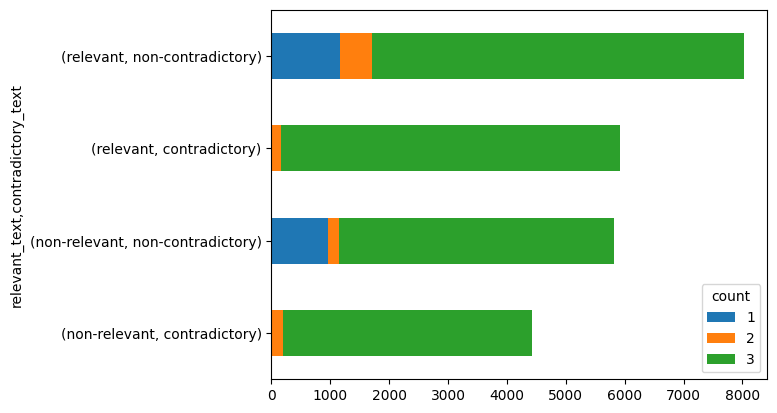

In [53]:
df_pairs.groupby(by = ['relevant_text', 'contradictory_text', 'count']).count()['queryId'].unstack().plot(kind='barh', stacked=True)

First and third are very important as all users agree. Others are questionable. Shall be exclude these from the further analysis?

In [54]:
# Select relevant columns from judgements_df
merged_df = judgements_df.groupby(by = ['queryId', 'documentId', 'relevanceLevel']).count()['id'].reset_index()
# Merge merged_df with flag_has_majority on 'queryId' and 'documentId'
merged_df = merged_df.merge(flag_is_contradictory, on=['queryId', 'documentId'])
merged_df = merged_df.merge(flag_has_majority, on=['queryId', 'documentId'])
merged_df['contradictory_text'] = merged_df['contradictory'].map({0: 'non-contradictory', 1: 'contradictory'})
merged_df['has_majority_text'] = merged_df['has_majority'].map({0: 'no majority', 1: 'has majority'})
pd.crosstab(merged_df['relevanceLevel'], merged_df['has_majority_text'])

has_majority_text,has majority,no majority
relevanceLevel,,
0_NOT_RELEVANT,6463,44
1_TOPIC_RELEVANT_DOES_NOT_ANSWER,12581,318
2_GOOD_ANSWER,13093,193
3_PERFECT_ANSWER,11645,169


In [55]:
pd.crosstab(merged_df['relevanceLevel'], merged_df['contradictory_text'])

contradictory_text,contradictory,non-contradictory
relevanceLevel,,
0_NOT_RELEVANT,2334,4173
1_TOPIC_RELEVANT_DOES_NOT_ANSWER,9097,3802
2_GOOD_ANSWER,7531,5755
3_PERFECT_ANSWER,5347,6467


### Compare single user votes against aggregated votes
Judge the reliability of users based on this. A high overlap with majority votes indicates a reliable user.

In [56]:
# define custom aggregation function for judgement aggregation (simply majority)
def majority_voting_agg(judgements):
    return judgements['relevanceLevel'].value_counts().idxmax()

# aggregate judgements
df_aggregated_judgements = judgements_df.groupby(by = ['queryId', 'documentId']).apply(majority_voting_agg).reset_index()
df_aggregated_judgements.columns = ['queryId', 'documentId', 'aggRelevance']
df_aggregated_judgements

,queryId,documentId,aggRelevance
0,db_q_<dbpedia:...That's_the_Way_It_Is>,db_<dbpedia:...That's_the_Way_It_Is>,3_PERFECT_ANSWER
1,db_q_<dbpedia:...That's_the_Way_It_Is>,db_<dbpedia:For_the_Love_of_Harry:_Everybody_S...,1_TOPIC_RELEVANT_DOES_NOT_ANSWER
2,db_q_<dbpedia:...That's_the_Way_It_Is>,db_<dbpedia:Old_Dirt_Road>,0_NOT_RELEVANT
3,db_q_<dbpedia:.hn>,db_<dbpedia:.hn>,0_NOT_RELEVANT
4,db_q_<dbpedia:.hn>,db_<dbpedia:Culture_of_Honduras>,1_TOPIC_RELEVANT_DOES_NOT_ANSWER
...,...,...,...
24184,trip_9999,trip_9337525,2_GOOD_ANSWER
24185,trip_9999,trip_9337888,3_PERFECT_ANSWER
24186,trip_9999,trip_9353917,3_PERFECT_ANSWER
24187,trip_9999,trip_9363894,1_TOPIC_RELEVANT_DOES_NOT_ANSWER


In [57]:
# Merge the two DataFrames on the common keys (assuming 'documentId' and 'queryId' are the common keys)
judgements_df_agg = judgements_df.merge(df_aggregated_judgements[['documentId', 'queryId', 'aggRelevance']], on=['documentId', 'queryId'], how='left')
# Add the new column based on the comparison
judgements_df_agg['hasMajorityVote'] = (judgements_df_agg['aggRelevance'] == judgements_df_agg['relevanceLevel']).astype(int)
judgements_df_agg

,id,relevanceLevel,relevanceCharacterRanges,durationUsedToJudgeMs,judgedAtUnixTS,documentId,queryId,userId,Range Category,aggRelevance,hasMajorityVote
0,1,2_GOOD_ANSWER,<no ranges selected>,15712,1648481149,rob_FBIS3-10909,rob_q_FBIS3-10909,User_0,<no ranges selected>,2_GOOD_ANSWER,1
1,2,0_NOT_RELEVANT,<no ranges selected>,160000,1648481336,rob_FBIS3-10383,rob_q_FT941-8917,User_0,<no ranges selected>,1_TOPIC_RELEVANT_DOES_NOT_ANSWER,0
2,3,1_TOPIC_RELEVANT_DOES_NOT_ANSWER,<no ranges selected>,16699,1648481352,rob_FBIS3-10722,rob_q_FBIS3-32394,User_0,<no ranges selected>,1_TOPIC_RELEVANT_DOES_NOT_ANSWER,1
3,4,2_GOOD_ANSWER,<no ranges selected>,3442,1648481339,rob_FBIS3-11360,rob_q_FBIS3-11360,User_1,<no ranges selected>,2_GOOD_ANSWER,1
4,5,2_GOOD_ANSWER,<no ranges selected>,15849,1648481354,rob_FBIS3-11056,rob_q_FBIS3-11617,User_1,<no ranges selected>,2_GOOD_ANSWER,1
...,...,...,...,...,...,...,...,...,...,...,...
67219,67676,3_PERFECT_ANSWER,133-399;1863-2100,54516,1649724672,trip_1766631,trip_228289,User_49,Other,2_GOOD_ANSWER,0
67220,67677,3_PERFECT_ANSWER,116-272;1694-1846,35868,1649724708,trip_1768761,trip_22420,User_49,Other,3_PERFECT_ANSWER,1
67221,67678,3_PERFECT_ANSWER,123-278;1809-2013,58469,1649724767,trip_1771729,trip_27540,User_49,Other,3_PERFECT_ANSWER,1
67222,67679,3_PERFECT_ANSWER,110-401,65513,1649724832,trip_1772193,trip_31051,User_49,Other,1_TOPIC_RELEVANT_DOES_NOT_ANSWER,0


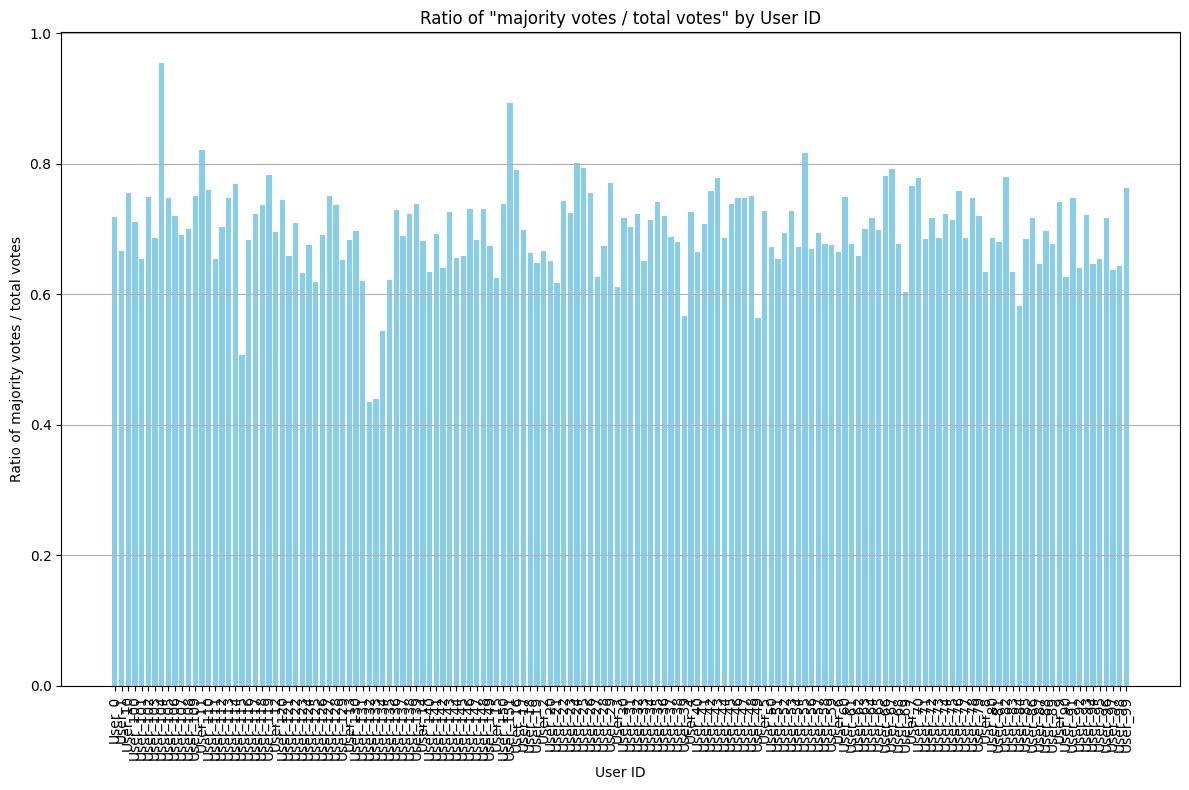

In [58]:
# Calculate the ratio of sum(aggRelevanceMatch) / length(aggRelevanceMatch) by userId
agg_relevance_ratio = judgements_df_agg.groupby('userId').agg(
    hasMajorityVote_sum=('hasMajorityVote', 'sum'),
    hasMajorityVote_count=('hasMajorityVote', 'size')
)

agg_relevance_ratio['ratio'] = agg_relevance_ratio['hasMajorityVote_sum'] / agg_relevance_ratio['hasMajorityVote_count']

# Plot the ratios
plt.figure(figsize=(12, 8))
plt.bar(agg_relevance_ratio.index, agg_relevance_ratio['ratio'], color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Ratio of majority votes / total votes')
plt.title('Ratio of "majority votes / total votes" by User ID')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.grid(axis='y')

plt.show()

This could be extended to check if user at least has correct tendency of answer (based on mapping_relevance) but then how to aggregate. Maybe another scrorecard. For now it is kept simple.

At which point to make the cut-off???

## Combine user votes and relevanceCharacterRanges
Is it possible to combine the above user reliability in terms of majority voting with relevanceCharacterRanges analysis?

In the next code chunck all user_ids are listed that have a ratio of the relevanceCharacterRanges > 1/3.

In [59]:
user_ids = grouped[grouped['Ratio'] >= 0.33].index.tolist()

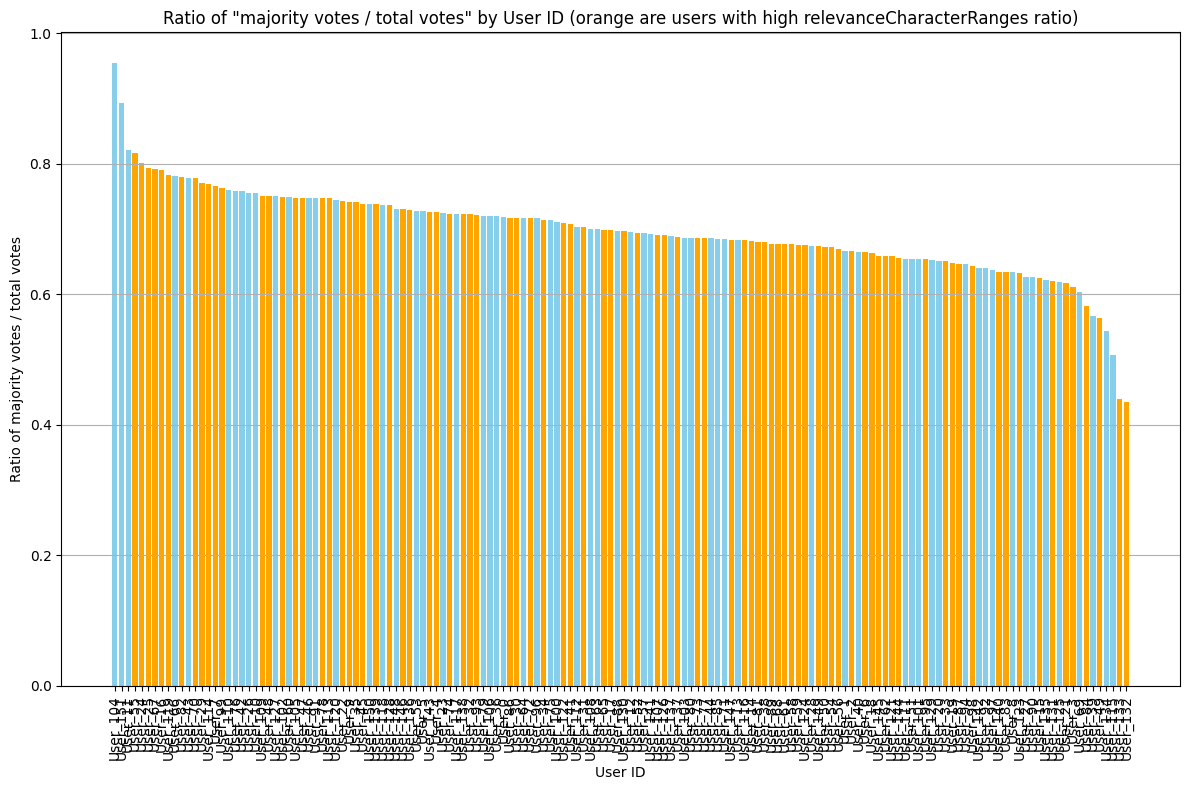

In [60]:
# Define colors
default_color = 'skyblue'
highlight_color = 'orange'

# Create a list of colors
colors = [highlight_color if user_id in user_ids else default_color for user_id in agg_relevance_ratio.index]

agg_relevance_ratio = agg_relevance_ratio.sort_values(by='ratio', ascending=False)

# Plot the ratios
plt.figure(figsize=(12, 8))
plt.bar(agg_relevance_ratio.index, agg_relevance_ratio['ratio'], color=colors)
plt.xlabel('User ID')
plt.ylabel('Ratio of majority votes / total votes')
plt.title('Ratio of "majority votes / total votes" by User ID (orange are users with high relevanceCharacterRanges ratio)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.grid(axis='y')

plt.show()

I would say it is not conclusive.

Now, do we aggregate on reliablity based on majority aggreement or on relevanceCharacterRanges ratio?

My preference is for "reliablity based on majority aggreement". --> Users with ratio of majority votes / total votes > 80% are very reliable and receive double weight, users inbetween 60-80% receive normal weight, and users below 60% get half the weight.

PS: I guess the lecturers do the same for our annotations :-)

# TODO: Decide on final aggregation setup
Furthermore, do we exclude some of the samples for final training purposes (e.g., the samples with "no majority").

### Calculate aggregated labels with higher weights for reliable users (based on relevanceCharacterRanges)

Now we could maybe define reliable users as having a ratio >50%. These users then get a higher weight in the aggregation of the labels.
Alternatively, we could say users >2/3 are very reliable, users between 1/3 and 2/3 and reliable and rest gets default weight.

In [61]:
# Initial DataFrame setup
judgements = judgements_df[['relevanceLevel', 'documentId', 'queryId', 'userId']]

# Remove NAs based on the relevanceLevel column
judgements.dropna(subset=['relevanceLevel'], inplace=True)

# Do a mapping to replace the values of the column relevanceLevel to values from 0-3
mapping = {
    '0_NOT_RELEVANT': 0,
    '1_TOPIC_RELEVANT_DOES_NOT_ANSWER': 1,
    '2_GOOD_ANSWER': 2,
    '3_PERFECT_ANSWER': 3
}
judgements['relevanceLevel'] = judgements['relevanceLevel'].map(mapping)

# Add a weight column based on whether the user is in the user_ids list
judgements['weight'] = judgements['userId'].apply(lambda x: 2 if x in user_ids else 1)

# Function to calculate the weighted average
def weighted_avg(group):
    return round((group['relevanceLevel'] * group['weight']).sum() / group['weight'].sum())

# Group by 'documentId' and 'queryId', then calculate the weighted average of 'relevanceLevel'
weighted_judgements = judgements.groupby(['documentId', 'queryId']).apply(weighted_avg).reset_index(name='weightedRelevanceLevel')

weighted_judgements


C:\Users\a96b3nc\AppData\Local\Temp\ipykernel_24680\2350545894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judgements.dropna(subset=['relevanceLevel'], inplace=True)
C:\Users\a96b3nc\AppData\Local\Temp\ipykernel_24680\2350545894.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judgements['relevanceLevel'] = judgements['relevanceLevel'].map(mapping)
C:\Users\a96b3nc\AppData\Local\Temp\ipykernel_24680\2350545894.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,documentId,queryId,weightedRelevanceLevel
0,db_<dbpedia:...That's_the_Way_It_Is>,db_q_<dbpedia:...That's_the_Way_It_Is>,3
1,db_<dbpedia:.hn>,db_q_<dbpedia:.hn>,2
2,db_<dbpedia:1041>,db_q_<dbpedia:House_at_1141_North_Chester_Avenue>,0
3,db_<dbpedia:10th_FAI_World_Rally_Flying_Champi...,db_q_<dbpedia:10th_FAI_World_Rally_Flying_Cham...,2
4,db_<dbpedia:14th_FAI_World_Rally_Flying_Champi...,db_q_<dbpedia:10th_FAI_World_Rally_Flying_Cham...,2
...,...,...,...
24184,trip_9995113,trip_21570,2
24185,trip_9996063,trip_69729,1
24186,trip_9996897,trip_59524,2
24187,trip_9997726,trip_675583,1


### Calculate aggregated labels with higher weights for reliable users (based on majority voting)

Users with majority voting ratio >80% get double weight, users between 60-80% get normal weight, and users with ratio below 60% get only 0.5 weight. Calculate then the average of labels.

In [62]:
judgements = judgements_df[['relevanceLevel', 'documentId', 'queryId', 'userId']]
judgements.dropna(subset=['relevanceLevel'], inplace=True)
mapping = {
    '0_NOT_RELEVANT': 0,
    '1_TOPIC_RELEVANT_DOES_NOT_ANSWER': 1,
    '2_GOOD_ANSWER': 2,
    '3_PERFECT_ANSWER': 3
}
judgements['relevanceLevel'] = judgements['relevanceLevel'].map(mapping)

ratio_dict = agg_relevance_ratio['ratio'].to_dict()
# Add a weight column
judgements['weight'] = judgements['userId'].apply(lambda x: 2 if ratio_dict.get(x, 0) >= 0.8 else 1 if 0.6 <= ratio_dict.get(x, 0) < 0.8 else 0.5)

# Function to calculate the weighted average
def weighted_avg(group):
    return round((group['relevanceLevel'] * group['weight']).sum() / group['weight'].sum())

# Group by 'documentId' and 'queryId', then calculate the weighted average of 'relevanceLevel'
weighted_judgements = judgements.groupby(['documentId', 'queryId']).apply(weighted_avg).reset_index(name='weightedRelevanceLevel')

weighted_judgements


C:\Users\a96b3nc\AppData\Local\Temp\ipykernel_24680\835190619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judgements.dropna(subset=['relevanceLevel'], inplace=True)
C:\Users\a96b3nc\AppData\Local\Temp\ipykernel_24680\835190619.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  judgements['relevanceLevel'] = judgements['relevanceLevel'].map(mapping)
C:\Users\a96b3nc\AppData\Local\Temp\ipykernel_24680\835190619.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,documentId,queryId,weightedRelevanceLevel
0,db_<dbpedia:...That's_the_Way_It_Is>,db_q_<dbpedia:...That's_the_Way_It_Is>,3
1,db_<dbpedia:.hn>,db_q_<dbpedia:.hn>,2
2,db_<dbpedia:1041>,db_q_<dbpedia:House_at_1141_North_Chester_Avenue>,0
3,db_<dbpedia:10th_FAI_World_Rally_Flying_Champi...,db_q_<dbpedia:10th_FAI_World_Rally_Flying_Cham...,2
4,db_<dbpedia:14th_FAI_World_Rally_Flying_Champi...,db_q_<dbpedia:10th_FAI_World_Rally_Flying_Cham...,2
...,...,...,...
24184,trip_9995113,trip_21570,2
24185,trip_9996063,trip_69729,1
24186,trip_9996897,trip_59524,2
24187,trip_9997726,trip_675583,1


In [63]:
pd.set_option('display.max_rows', None)
judgements
pd.reset_option('display.max_rows')